### This notebook begins the project by collecting and cleaning the data needed to create the time series

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

from datetime import timedelta

% matplotlib inline

In [2]:
# Check out a contact for soybeans from quandl
beans = quandl.get('CME/SX2016', authtoken='Hv95pPh1xQWzt5DFhxS7')
beans.dropna().head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2014-10-30,998.0,1000.75,982.00,982.5,10.50,987.50,143.0,1772.0
2015-02-19,979.0,987.00,972.50,984.5,9.00,983.50,151.0,2956.0
2015-03-09,969.0,970.00,965.50,970.0,4.00,967.00,64.0,3490.0
2015-03-23,954.0,967.25,954.00,964.0,8.00,963.25,138.0,4447.0
2015-04-28,959.5,965.50,953.75,955.0,2.75,954.75,266.0,5834.0


In [3]:
beans.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,999.0,703.782533,453.605740,0.00,0.0000,944.250,1007.0000,1250.00
High,1001.0,710.407343,456.062846,0.00,0.0000,951.750,1014.5000,1250.00
Low,1000.0,705.562000,449.186245,0.00,0.0000,940.750,1000.3125,1250.00
Last,354.0,948.456921,71.289668,860.00,889.8125,928.625,984.3750,1162.00
Change,683.0,7.566618,7.227056,0.00,2.7500,5.500,10.0000,60.25
Settle,1008.0,1037.662946,106.615126,859.75,953.9375,1021.375,1127.8125,1256.50
Volume,1008.0,16316.289683,38440.486985,0.00,0.0000,57.500,4105.2500,219688.00
Open Interest,1008.0,59880.424603,116421.998789,0.00,19.0000,1908.000,61813.0000,435825.00


In [4]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2012-11-14 to 2016-11-14
Data columns (total 8 columns):
Open             999 non-null float64
High             1001 non-null float64
Low              1000 non-null float64
Last             354 non-null float64
Change           683 non-null float64
Settle           1008 non-null float64
Volume           1008 non-null float64
Open Interest    1008 non-null float64
dtypes: float64(8)
memory usage: 70.9 KB


In [5]:
beans.dtypes

Open             float64
High             float64
Low              float64
Last             float64
Change           float64
Settle           float64
Volume           float64
Open Interest    float64
dtype: object

In [6]:
beans.head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2012-11-14,0.0,0.0,0.0,NaN,NaN,1224.75,0.0,0.0
2012-11-15,0.0,0.0,0.0,NaN,NaN,1218.50,0.0,0.0
2012-11-16,0.0,0.0,1210.0,NaN,NaN,1210.00,0.0,0.0
2012-11-19,0.0,0.0,0.0,NaN,NaN,1224.00,0.0,0.0
2012-11-20,0.0,0.0,0.0,NaN,NaN,1239.00,0.0,0.0


In [7]:
cpy = beans.copy()
test = []
test.append(beans)
test.append(cpy)
test

[               Open     High      Low     Last  Change   Settle    Volume  \
 Date                                                                        
 2012-11-14     0.00     0.00     0.00      NaN     NaN  1224.75       0.0   
 2012-11-15     0.00     0.00     0.00      NaN     NaN  1218.50       0.0   
 2012-11-16     0.00     0.00  1210.00      NaN     NaN  1210.00       0.0   
 2012-11-19     0.00     0.00     0.00      NaN     NaN  1224.00       0.0   
 2012-11-20     0.00     0.00     0.00      NaN     NaN  1239.00       0.0   
 2012-11-21     0.00     0.00     0.00      NaN     NaN  1232.00       0.0   
 2012-11-23     0.00     0.00     0.00      NaN     NaN  1232.50       0.0   
 2012-11-26     0.00     0.00     0.00      NaN     NaN  1241.75       0.0   
 2012-11-27     0.00     0.00     0.00      NaN     NaN  1254.75       0.0   
 2012-11-28     0.00     0.00     0.00      NaN     NaN  1252.00       0.0   
 2012-11-29     0.00     0.00     0.00      NaN     NaN  1253.75

In [8]:
concat = pd.concat([test[0], test[1]])
concat

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2012-11-14,0.00,0.00,0.00,NaN,NaN,1224.75,0.0,0.0
2012-11-15,0.00,0.00,0.00,NaN,NaN,1218.50,0.0,0.0
2012-11-16,0.00,0.00,1210.00,NaN,NaN,1210.00,0.0,0.0
2012-11-19,0.00,0.00,0.00,NaN,NaN,1224.00,0.0,0.0
2012-11-20,0.00,0.00,0.00,NaN,NaN,1239.00,0.0,0.0
2012-11-21,0.00,0.00,0.00,NaN,NaN,1232.00,0.0,0.0
2012-11-23,0.00,0.00,0.00,NaN,NaN,1232.50,0.0,0.0
2012-11-26,0.00,0.00,0.00,NaN,NaN,1241.75,0.0,0.0
2012-11-27,0.00,0.00,0.00,NaN,NaN,1254.75,0.0,0.0


In [9]:
beans.loc['2012-11-19']

Open                0.0
High                0.0
Low                 0.0
Last                NaN
Change              NaN
Settle           1224.0
Volume              0.0
Open Interest       0.0
Name: 2012-11-19 00:00:00, dtype: float64

In [10]:
beans.index[-5].to_pydatetime() + timedelta(days=1)


datetime.datetime(2016, 11, 9, 0, 0)

In [12]:
beans.index[-5].to_pydatetime()

datetime.datetime(2016, 11, 8, 0, 0)

In [13]:
start_date = beans.index[-5]
beans.loc[start_date]

Open              989.50
High             1011.25
Low               989.00
Last             1000.50
Change             12.50
Settle           1001.75
Volume           3392.00
Open Interest    5079.00
Name: 2016-11-08 00:00:00, dtype: float64

In [14]:
beans.index.get_loc(start_date)

1003

In [15]:
x16 = quandl.get('CME/SX2016', authtoken='Hv95pPh1xQWzt5DFhxS7')
u16 = quandl.get('CME/SU2016', authtoken='Hv95pPh1xQWzt5DFhxS7')
u16.head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2013-11-14,0.0,0.0,0.0,NaN,NaN,1168.50,0.0,0.0
2013-11-15,0.0,0.0,0.0,NaN,NaN,1145.00,0.0,0.0
2013-11-18,0.0,0.0,0.0,NaN,NaN,1142.25,0.0,0.0
2013-11-19,0.0,0.0,0.0,NaN,NaN,1139.25,0.0,0.0
2013-11-20,0.0,0.0,0.0,NaN,NaN,1145.00,0.0,0.0


In [16]:
u16[u16.Last.isnull()]

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2013-11-14,0.00,0.00,0.00,NaN,NaN,1168.50,0.0,0.0
2013-11-15,0.00,0.00,0.00,NaN,NaN,1145.00,0.0,0.0
2013-11-18,0.00,0.00,0.00,NaN,NaN,1142.25,0.0,0.0
2013-11-19,0.00,0.00,0.00,NaN,NaN,1139.25,0.0,0.0
2013-11-20,0.00,0.00,0.00,NaN,NaN,1145.00,0.0,0.0
2013-11-21,0.00,0.00,0.00,NaN,NaN,1150.00,0.0,0.0
2013-11-22,0.00,0.00,0.00,NaN,NaN,1152.25,0.0,0.0
2013-11-25,0.00,0.00,0.00,NaN,NaN,1150.25,0.0,0.0
2013-11-26,0.00,0.00,0.00,NaN,NaN,1146.00,0.0,0.0


In [17]:
product_map = {'S': ['CME', ['F', 'H', 'K', 'N', 'Q', 'U', 'X']],
               'SB': ['ICE', ['H', 'K', 'N', 'V']]}

In [18]:
test_dict = {}
product = 'S'

for year in (['2012', '2013', '2014']):
    for month in product_map[product][1]:
        test_dict['{}{}'.format(month, year[-2:])] = quandl.get('{}/{}{}{}'.format(product_map[product][0], product, month, year) , authtoken='Hv95pPh1xQWzt5DFhxS7')

        
test_dict['X14'].head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2010-11-12,1093.50,1093.50,1093.50,NaN,NaN,1093.50,0.0,0.0
2010-11-15,1107.00,1107.00,1107.00,NaN,NaN,1107.00,0.0,0.0
2010-11-16,1067.00,1067.00,1067.00,NaN,NaN,1067.00,0.0,0.0
2010-11-17,1054.00,1054.00,1054.00,NaN,NaN,1054.00,0.0,0.0
2010-11-18,1081.25,1081.25,1081.25,NaN,NaN,1081.25,0.0,0.0


In [29]:
beans.iloc[-5]

Open              989.50
High             1011.25
Low               989.00
Last             1000.50
Change             12.50
Settle           1001.75
Volume           3392.00
Open Interest    5079.00
Name: 2016-11-08 00:00:00, dtype: float64

In [243]:
def concat_contracts(df1, df2):
    ''' This function takes in 2 dataframes of closing price information for consecutive futures
        contracts and concatenates them using a 4-day rolling window.  It returns a dataframe of the 
        concatenation.
        
        Args: df1 - the first dataframe of closing price info
              df2 - the next dataframe of closing price info
              
        Return: concat_df - dataframe of the concatenation of df1 and df2
    '''
    # Store important roll dates for indexing later
    last_date = df1.index[-5]
    roll_dates = [df1.index[-x] for x in range(4,0,-1)]
    df1_roll_index = df1.index.get_loc(roll_dates[0])
    df2_roll_index = df2.index.get_loc(roll_dates[0])
    first_date = df2.index[df2_roll_index + 4]
    
    # Create a list of the roll calculations for each day    
    roll_calc = [((0.8 * df1.close[df1_roll_index]) + 0.2 * df2.close[df2_roll_index]),
                 ((0.6 * df1.close[(df1_roll_index + 1)]) + 0.4 * df2.close[(df2_roll_index + 1)]),
                 ((0.4 * df1.close[(df1_roll_index + 2)]) + 0.6 * df2.close[(df2_roll_index + 2)]),
                 ((0.2 * df1.close[(df1_roll_index + 3)]) + 0.8 * df2.close[(df2_roll_index + 3)])]
    
    # Take all data from first series up to last_date
    concat_df = pd.DataFrame(df1.close[:last_date])
    concat_df.columns = ['close']
    
    # Iterate through roll_dates and roll_calc to append roll data
    for i in range(4):
        concat_df.loc[roll_dates[i]] = roll_calc[i]
    
    # Finally concatenate the rest of the data from the second series
    concat_df = pd.DataFrame(pd.concat([concat_df.close, df2.close[first_date:]]))
    concat_df.columns = ['close']
    
    return concat_df

In [244]:
def clean_df(df, days=200):
    ''' This function takes in a dataframe and number of days and returns a cleaned dataframe, with only the last
        "days" number of data points, with irrelevant data dropped and relevant columns renamed, and the `change`
        column corrected.
        
        Args: df - dataframe of price information
              days - number of data points to extract from the end
              
        Return: df - dataframe cleaned, with relevant and correct price information
    '''
    # Filter data to get the last 200 data points with a real settle price
    df = df[df.Settle > 0.0][-days:]
    
    # Drop unnecessary columns and rename
    df = df.reindex(columns=['Open', 'High', 'Low', 'Settle', 'Volume', 'Open Interest'])
    df.rename(columns={'Open': 'open',
                       'High': 'high',
                       'Low': 'low',
                       'Settle': 'close',
                       'Volume': 'volume',
                       'Open Interest': 'open_interest'}, inplace=True)
    
    # Add `change` back in correctly
    df['change'] = df.close - df.close.shift()

    return df[1:]

In [167]:
product = 'S'
start_year = 2010
end_year = 2016

In [245]:
product_map = {'CL': [1, 'Crude_Oil', 'Energy', 'CME', 'FGHJKMNQUVXZ'],
               'NG': [1, 'Natural_Gas', 'Energy', 'CME', 'FGHJKMNQUVXZ'],
               'HO': [1, 'Heating_Oil', 'Energy', 'CME', 'FGHJKMNQUVXZ'],
               'RB': [1, 'Gasoline', 'Energy', 'CME', 'FGHJKMNQUVXZ'],
               'B': [1, 'Brent_Crude_Oil', 'Energy', 'ICE', 'FGHJKMNQUVXZ'],
               'BO': [1, 'Soybean_Oil', 'Grains', 'CME', 'FHKNQUVZ'],
               'SM': [1, 'Soybean_Meal', 'Grains', 'CME', 'FHKNUVZ'],
               'W': [1, 'Wheat', 'Grains', 'CME', 'HKNUZ'],
               'C': [1, 'Corn', 'Grains', 'CME', 'HKNUZ'],
               'S': [1, 'Soybeans', 'Grains', 'CME', 'FHKNQUX'],
               'SB': [1, 'Sugar', 'Softs', 'ICE', 'HKNV'],
               'KC': [1, 'Coffee', 'Softs', 'ICE', 'HKNUZ'],
               'RC': [1, 'Robusta_Coffee', 'Softs', 'LIFFE', 'FHKNUX'],
               'CC': [1, 'Cocoa', 'Softs', 'ICE', 'HKNUZ'],
               'CT': [1, 'Cotton', 'Softs', 'ICE', 'HKNVZ']}

In [250]:
def get_quandl_list(product, product_map, api_key, start_year=2006, end_year=2016):
    ''' This function takes in a product, map, start and end year as well as an api key for quandl,
        and returns a list of dataframes for price information on each futures contract from the start
        date to the end date.
        
        Args: product - str symbol for specific product
              product_map - dict mapping product symbols to information
              start_year - int year to start analysis
              end_year - int year to end analysis
              api_key - str api key for quandl
              
        Return: df_list - list of dataframes of price information
    '''
    # Initialize final list of dataframes
    df_list = []
    
    # Set exchange and contract information for product
    exch = product_map[product][3]
    contracts = product_map[product][4]
    
    # Iterate through all years
    for year in range(start_year, end_year + 1):
        # Over all contract months
        for month in contracts:
            # Call quandl API, clean data and append to final list
            df = quandl.get('{}/{}{}{}'.format(exch, product, month, year), authtoken=api_key)
            df = clean_df(df)
            df_list.append(df)
    
    return df_list

In [247]:
def combine_list(df_list):
    ''' This function takes in a list of dataframes and combines them, returning a final_df which is the
        concatenation of all dataframes in the list.
        
        Args: df_list - list of dataframes in consecutive order
        
        Return: final_df - dataframe which is the concatenation of the list of dataframes
    '''
    # If only one dataframe in list just return it
    if len(df_list) == 1:
        return df_list[0]
    
    # Set final dataframe equal to first in list
    final_df = df_list[0]
    
    # Iterate through the rest of the dataframes and apply `concat_contracts` function
    for i in range(1, len(df_list)):
        final_df = concat_contracts(final_df, df_list[i])
        
    return final_df

In [106]:
bean_list = get_quandl_df(product, product_map, start_year, end_year, api_key='Hv95pPh1xQWzt5DFhxS7')

In [251]:
ts_dict = {}

for product in product_map:
    prod_list = get_quandl_list(product, product_map, api_key='Hv95pPh1xQWzt5DFhxS7')
    prod_df = combine_dfs(prod_list)
    ts_dict[product] = prod_df

In [252]:
ts_dict.keys()

dict_keys(['CL', 'NG', 'HO', 'RB', 'B', 'BO', 'SM', 'W', 'C', 'S', 'SB', 'KC', 'RC', 'CC', 'CT'])

In [107]:
bean_list[1].head()

,open,high,low,close,volume,open_interest,change
Date,,,,,,,
2009-01-20,971.0,971.0,971.00,971.00,95.0,NaN,-15.00
2009-01-21,992.0,992.0,992.00,992.00,33.0,NaN,21.00
2009-01-22,975.5,975.5,975.50,975.50,0.0,NaN,-16.50
2009-01-23,968.0,968.0,961.25,961.25,1.0,NaN,-14.25
2009-01-26,986.0,986.0,964.00,964.00,3.0,NaN,2.75


In [108]:
len(bean_list)

49

In [109]:
final_df = combine_dfs(bean_list)

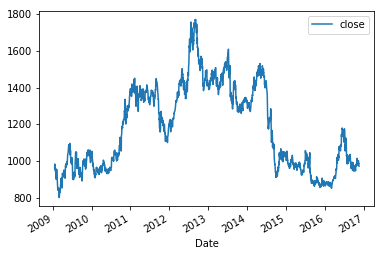

In [110]:
final_df.plot()

In [111]:
bean_list[4].head()

,open,high,low,close,volume,open_interest,change
Date,,,,,,,
2009-09-09,944.0,946.00,938.00,940.25,44.0,NaN,-3.75
2009-09-10,936.5,942.75,935.75,936.50,12.0,NaN,-3.75
2009-09-11,917.0,930.00,912.50,917.00,65.0,NaN,-19.50
2009-09-14,917.0,917.00,909.00,917.00,76.0,NaN,0.00
2009-09-15,962.0,962.25,920.00,962.00,63.0,NaN,45.00


In [171]:
product = 'SB'
start_year = 2011
end_year = 2017

In [113]:
sugar_list = get_quandl_df(product, product_map, start_year, end_year, api_key='Hv95pPh1xQWzt5DFhxS7')

In [114]:
sugar_ts = combine_dfs(sugar_list)

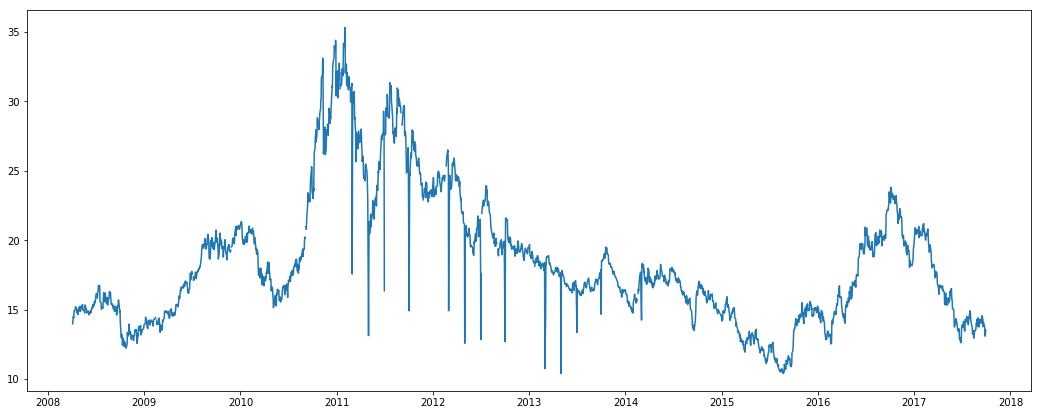

In [129]:
plt.figure(figsize=(18,7))
plt.plot(sugar_ts)

In [118]:
sugar_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2424 entries, 2008-04-04 to 2017-09-29
Data columns (total 1 columns):
close    2393 non-null float64
dtypes: float64(1)
memory usage: 117.9 KB


In [128]:
sugar_ts.iloc[700:800]

,close
Date,
2010-12-20,32.960
2010-12-21,33.020
2010-12-22,33.130
2010-12-23,33.980
2010-12-27,33.640
2010-12-28,34.390
2010-12-29,33.830
2010-12-30,30.380
2010-12-31,32.120


In [145]:
s = sugar_list[10]
s.tail()

,open,high,low,close,volume,open_interest,change
Date,,,,,,,
2013-06-25,17.00,17.29,16.93,17.07,48590.0,NaN,0.06
2013-06-26,17.00,17.07,16.87,17.01,32491.0,NaN,-0.06
2013-06-27,16.90,17.07,16.36,16.47,33520.0,NaN,-0.54
2013-06-28,16.55,16.66,16.02,16.38,5098.0,NaN,-0.09
2013-07-01,0.00,0.00,0.00,0.00,0.0,NaN,-16.38


In [172]:
l1 = get_quandl_df(product, product_map, start_year, end_year, api_key='Hv95pPh1xQWzt5DFhxS7')

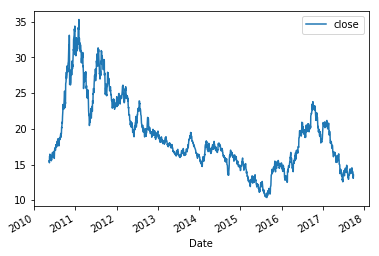

In [174]:
combine_dfs(l1).plot()

In [175]:
def final(product, product_map, start_year, end_year, api_key):
    list1 = get_quandl_df(product, product_map, start_year, end_year, api_key)
    return combine_dfs(list1)

In [179]:
crude = final('CL', product_map, start_year, end_year, 'Hv95pPh1xQWzt5DFhxS7')

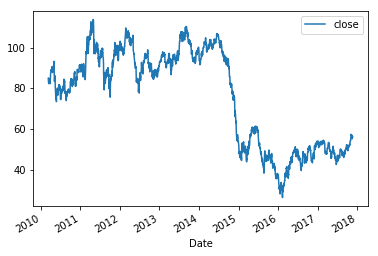

In [180]:
crude.plot()

In [181]:
product = 'S'
start_year = 1970
end_year = 1980

soybeans = final(product, product_map, start_year, end_year, 'Hv95pPh1xQWzt5DFhxS7')

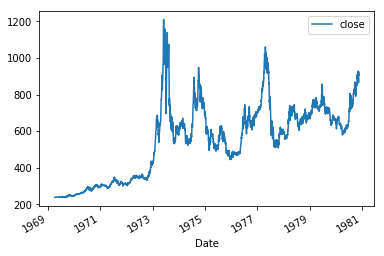

In [182]:
soybeans.plot()

In [184]:
soybeans.tail()

,close
Date,
1980-11-12,887.50
1980-11-13,885.75
1980-11-14,908.00
1980-11-17,905.25
1980-11-18,922.50


In [185]:
import math

In [187]:
soybeans['20day_hv'] = math.sqrt(252) * soybeans['close'].pct_change().rolling(window=20, center=False).std()
soybeans.tail()

,close,20day_hv
Date,,
1980-11-12,887.50,0.301213
1980-11-13,885.75,0.301329
1980-11-14,908.00,0.306810
1980-11-17,905.25,0.305818
1980-11-18,922.50,0.310107


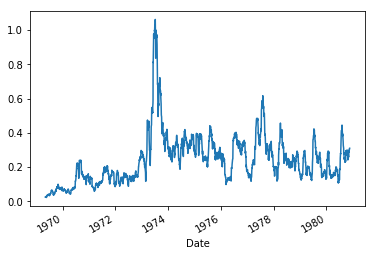

In [188]:
soybeans['20day_hv'].plot()

In [189]:
import sqlite3

In [190]:
def insert_daily_prices_table(product_map, ts_dict, sqlite_file, table_name='Closing_Prices'):
    ''' This function takes in a 2 dicts, one with product keys mapping
        to info about the product and the other with product keys mapping
        to a dataframe a daily price information.  It also takes in a sqlite
        file and then uses the info to insert all rows into the Daily_Prices
        table of the database.

        Args: product_dict - a dict of symbols for products with maps to
                             a list of info
              df_dict - dict of dataframes with futures symbols and price data
              sqlite_file - file for the database to write to
              table_name - default to 'Daily_Prices' for this function

        Return: None - nothing explicit but inserts info into the database
    '''
    # Create the column name list for database insertion
    cols = ['data_id', 'symbol', 'date', 'close']

    # Open a connection to the database
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()

    # Iterate through all symbols and then the dataframe to get all price data
    for symbol, ts in ts_dict.items():
        data_id = product_map[symbol][0]
        for i, row in ts.iterrows():
            date = i.strftime('%Y-%m-%d')
            # Set params and insert row into database
            params = (data_id, symbol, date, row.close)
            c.execute("INSERT INTO {tn} ({c0}, {c1}, {c2}, {c3}) VALUES (?, ?, ?, ?)"\
                .format(tn=table_name, c0=cols[0], c1=cols[1], c2=cols[2], c3=cols[3]), params)

    # Close connection to database
    conn.commit()
    conn.close()

In [191]:
ts_dict = {'S': soybeans}

In [253]:
def insert_closing_prices_table(product_map, ts_dict, sqlite_file, table_name='Closing_Prices'):
    ''' This function takes in a 2 dicts, one with product keys mapping
        to info about the product and the other with product keys mapping
        to a time-series of closing price information.  It also takes in a sqlite
        file and then uses the info to insert all rows into the Closing_Prices
        table of the database.

        Args: product_dict - a dict of symbols for products with maps to
                             a list of info
              df_dict - dict of dataframes with futures symbols and price data
              sqlite_file - file for the database to write to
              table_name - default to 'Closing_Prices' for this function

        Return: None - nothing explicit but inserts info into the database
    '''
    # Create the column name list for database insertion
    cols = ['data_id', 'symbol', 'date', 'close']

    # Open a connection to the database
    conn = sqlite3.connect(sqlite_file)
    c = conn.cursor()

    # Iterate through all symbols and then the dataframe to get all price data
    for symbol, ts in ts_dict.items():
        data_id = product_map[symbol][0]
        for i, row in ts.iterrows():
            date = i.strftime('%Y-%m-%d')
            # Set params and insert row into database
            params = (data_id, symbol, date, row.close)
            c.execute("INSERT INTO {tn} ({c0}, {c1}, {c2}, {c3}) VALUES (?, ?, ?, ?)"\
                .format(tn=table_name, c0=cols[0], c1=cols[1], c2=cols[2], c3=cols[3]), params)

    # Close connection to database
    conn.commit()
    conn.close()

In [255]:
ts_dict

{'B':              close
 Date              
 2005-03-08  50.480
 2005-03-09  50.600
 2005-03-10  50.230
 2005-03-11  50.940
 2005-03-14  51.820
 2005-03-15  52.120
 2005-03-16  53.440
 2005-03-17  53.830
 2005-03-18  54.580
 2005-03-21  55.000
 2005-03-22  54.640
 2005-03-23  53.770
 2005-03-24  53.750
 2005-03-29  52.210
 2005-03-30  52.060
 2005-03-31  54.160
 2005-04-01  56.590
 2005-04-04  56.860
 2005-04-05  56.160
 2005-04-06  55.680
 2005-04-07  54.910
 2005-04-08  53.760
 2005-04-11  54.260
 2005-04-12  53.030
 2005-04-13  51.580
 2005-04-14  52.140
 2005-04-15  51.730
 2005-04-18  50.910
 2005-04-19  52.560
 2005-04-20  53.430
 ...            ...
 2016-09-20  45.880
 2016-09-21  46.830
 2016-09-22  47.650
 2016-09-23  45.890
 2016-09-26  47.350
 2016-09-27  46.080
 2016-09-28  48.910
 2016-09-29  49.582
 2016-09-30  49.964
 2016-10-03  50.890
 2016-10-04  50.870
 2016-10-05  51.860
 2016-10-06  52.510
 2016-10-07  51.930
 2016-10-10  53.140
 2016-10-11  52.410
 2016-10-12  51

In [256]:
insert_closing_prices_table(product_map, ts_dict, 'test7.sqlite')

In [193]:
ts_dict = {}

for product in product_map:
    ts = final(product, product_map, 2010, 2016, 'Hv95pPh1xQWzt5DFhxS7')
    ts_dict[product] = ts

In [194]:
ts_dict.keys()

dict_keys(['CL', 'NG', 'S', 'SB'])

In [195]:
product_map

{'CL': [1, 'Crude_Oil', 'Energy', 'CME', 'FGHJKMNQUVXZ'],
 'NG': [1, 'Natural_Gas', 'Energy', 'CME', 'FGHJKMNQUVXZ'],
 'S': [1, 'Soybeans', 'Grains', 'CME', 'FHKNQUX'],
 'SB': [1, 'Sugar', 'Softs', 'ICE', 'HKNV']}

In [201]:
del ts_dict['S']

In [202]:
ts_dict.keys()

dict_keys(['CL', 'NG', 'SB'])

In [203]:
insert_daily_prices_table(product_map, ts_dict, 'test5.sqlite')

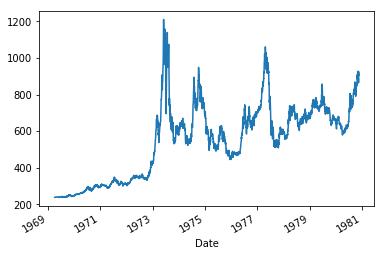

In [205]:
soybeans.close.plot()

In [206]:
soybeans_all = final('S', product_map, 1970, 2016, 'Hv95pPh1xQWzt5DFhxS7')

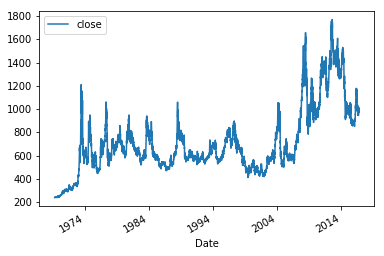

In [207]:
soybeans_all.plot()

/Users/Frank/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/Frank/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


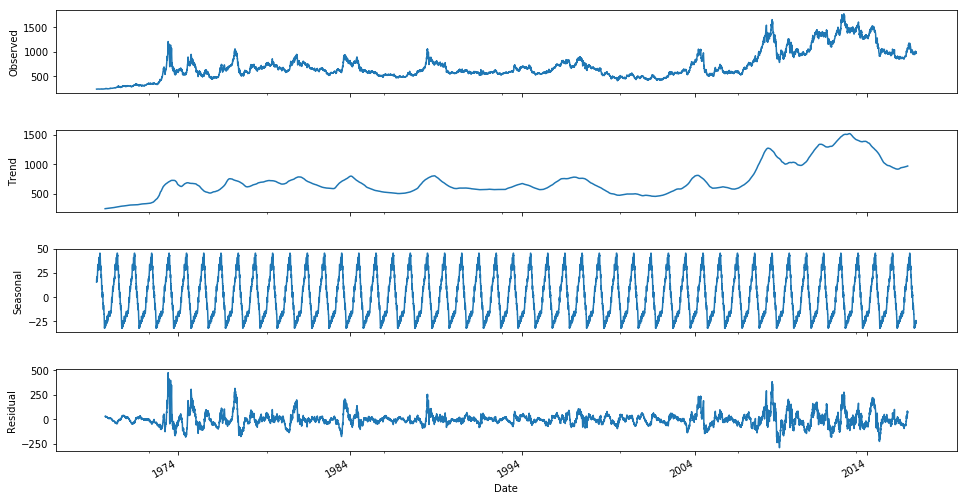

In [214]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(soybeans_all.close, freq=252)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [217]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


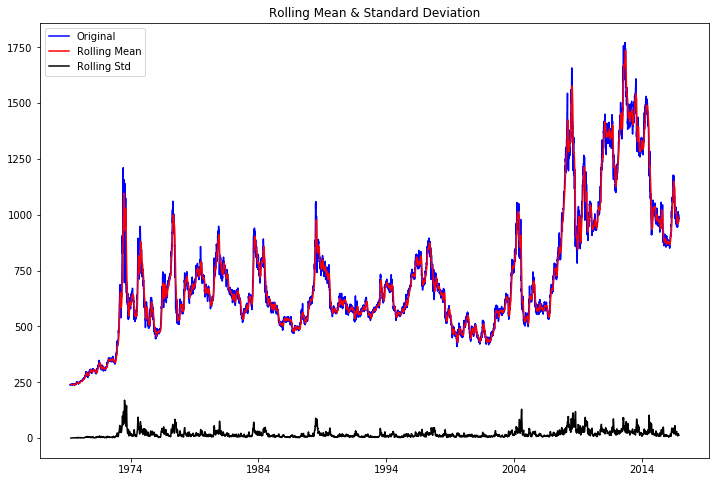

Results of Dickey-Fuller Test:
Test Statistic                    -3.134154
p-value                            0.024127
#Lags Used                        40.000000
Number of Observations Used    11950.000000
Critical Value (1%)               -3.430897
Critical Value (5%)               -2.861782
Critical Value (10%)              -2.566899
dtype: float64


In [218]:
test_stationarity(soybeans_all.close)

/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


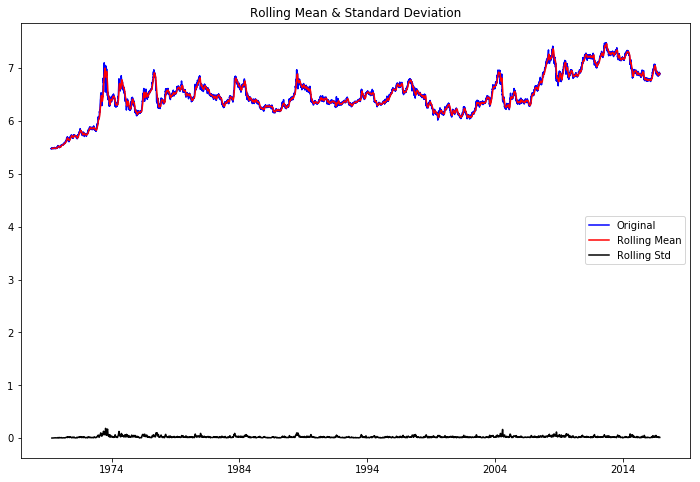

Results of Dickey-Fuller Test:
Test Statistic                    -3.169173
p-value                            0.021840
#Lags Used                        33.000000
Number of Observations Used    11957.000000
Critical Value (1%)               -3.430897
Critical Value (5%)               -2.861782
Critical Value (10%)              -2.566899
dtype: float64


In [230]:
soybeans_log = soybeans_all.close.apply(lambda x: np.log(x))
test_stationarity(soybeans_log.dropna())

In [219]:
soybeans_all['historical_vol'] = math.sqrt(252) * soybeans_all['close'].pct_change().rolling(window=20, center=False).std()

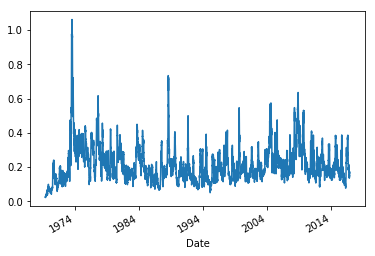

In [220]:
soybeans_all.historical_vol.plot()

/Users/Frank/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/Frank/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


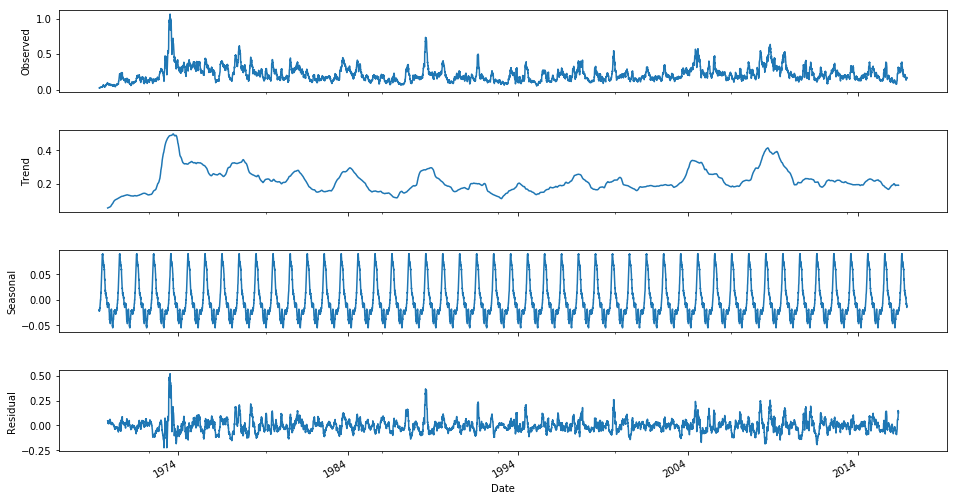

In [222]:
decomposition = seasonal_decompose(soybeans_all.historical_vol.dropna(), freq=252)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


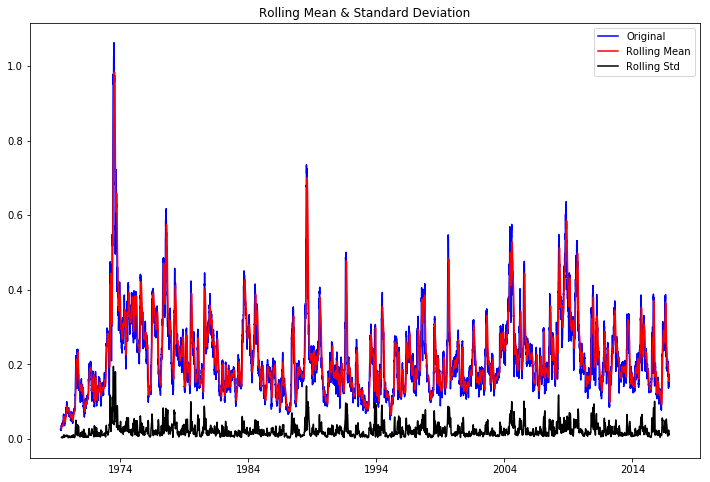

Results of Dickey-Fuller Test:
Test Statistic                -7.224701e+00
p-value                        2.067581e-10
#Lags Used                     4.000000e+01
Number of Observations Used    1.193000e+04
Critical Value (1%)           -3.430898e+00
Critical Value (5%)           -2.861782e+00
Critical Value (10%)          -2.566899e+00
dtype: float64


In [223]:
test_stationarity(soybeans_all.historical_vol.dropna())

In [224]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

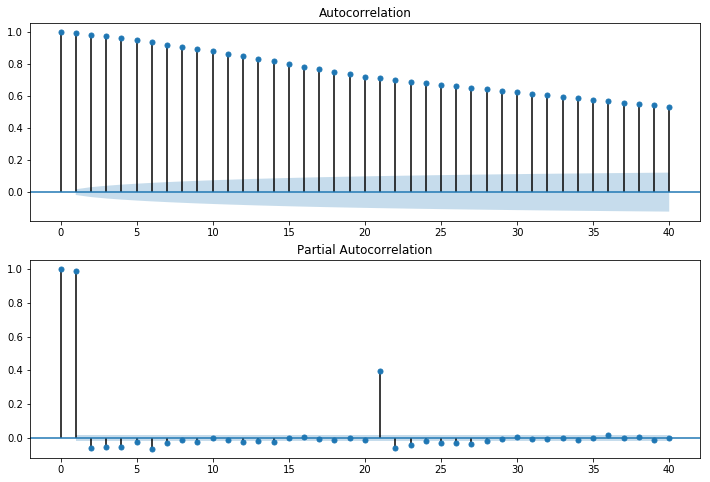

In [227]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(soybeans_all.historical_vol.iloc[21:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(soybeans_all.historical_vol.iloc[21:], lags=40, ax=ax2)

/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


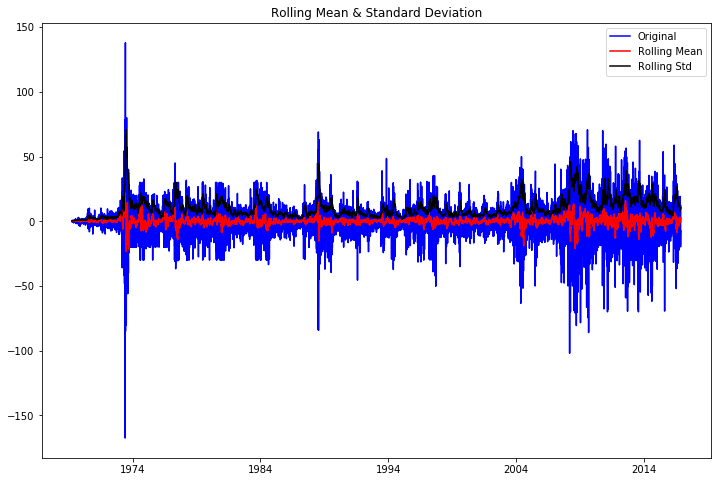

Results of Dickey-Fuller Test:
Test Statistic                -1.542464e+01
p-value                        3.003031e-28
#Lags Used                     4.000000e+01
Number of Observations Used    1.194900e+04
Critical Value (1%)           -3.430897e+00
Critical Value (5%)           -2.861782e+00
Critical Value (10%)          -2.566899e+00
dtype: float64


In [228]:
soybeans_all['first_diff'] = soybeans_all.close - soybeans_all.close.shift()
test_stationarity(soybeans_all.first_diff.dropna())

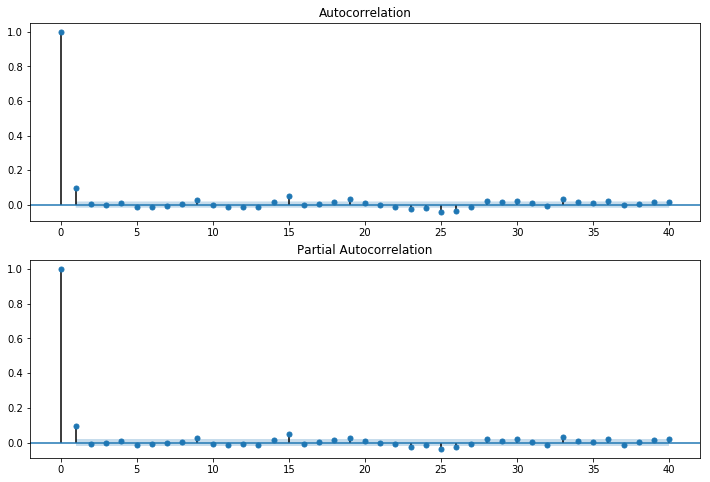

In [229]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(soybeans_all.first_diff.iloc[21:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(soybeans_all.first_diff.iloc[21:], lags=40, ax=ax2)

/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  


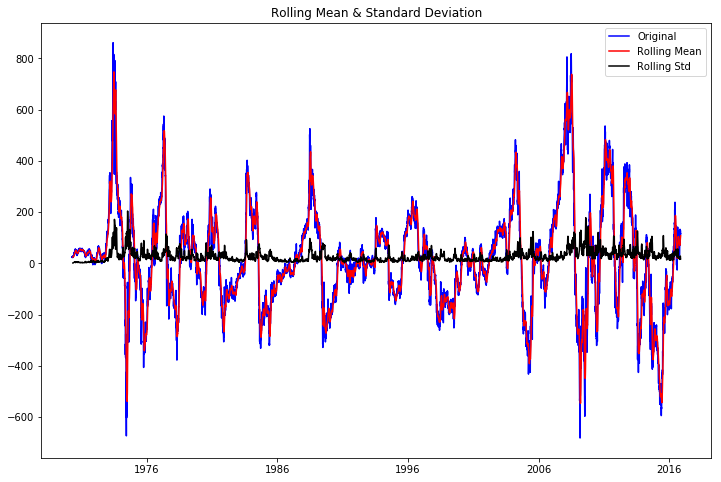

Results of Dickey-Fuller Test:
Test Statistic                -6.005758e+00
p-value                        1.617043e-07
#Lags Used                     3.400000e+01
Number of Observations Used    1.170400e+04
Critical Value (1%)           -3.430909e+00
Critical Value (5%)           -2.861787e+00
Critical Value (10%)          -2.566901e+00
dtype: float64


In [234]:
soybeans_seasonal = soybeans_all.close - soybeans_all.close.shift(252)
test_stationarity(soybeans_seasonal.dropna())